<a href="https://colab.research.google.com/github/TANKIANAUN/Machine-Learning/blob/master/Reccomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Add, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip


--2020-06-07 10:29:42--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K   815KB/s    in 1.2s    

2020-06-07 10:29:43 (815 KB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]



In [0]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [0]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movies['movieId'].count()

9742

In [0]:
print(len(movies['movieId']))
print(len(ratings['userId'].unique()))

9742
610


In [0]:
ratings=ratings.merge(movies,on='movieId').drop(['genres','timestamp'],axis=1)

In [0]:
ratings.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [0]:

user_enc = LabelEncoder()
ratings['userSeq'] = user_enc.fit_transform(ratings['userId'].values)

item_enc = LabelEncoder()
ratings['movieSeq'] = item_enc.fit_transform(ratings['movieId'].values)

ratings.head()

,userId,movieId,rating,title,userSeq,movieSeq
0,1,1,4.0,Toy Story (1995),0,0
1,5,1,4.0,Toy Story (1995),4,0
2,7,1,4.5,Toy Story (1995),6,0
3,15,1,2.5,Toy Story (1995),14,0
4,17,1,4.5,Toy Story (1995),16,0


In [0]:
train_unused, test = train_test_split(ratings, test_size=0.20, random_state=0)

# All data is used for training
train = ratings

numUsers = len(train.userSeq.unique())
numMovies = len(train.movieSeq.unique())
print((numUsers, numMovies))
print((len(train), len(test)))

(610, 9724)
(100836, 20168)


In [0]:
numFeatures = 50
dropout = 0.0

user_input = Input(shape=(1,))
user_emb = Embedding(numUsers, numFeatures)(user_input)
flat_user = Flatten()(user_emb)
user_dropout = Dropout(dropout)(flat_user)

movie_input = Input(shape=(1,))
movie_emb = Embedding(numMovies, numFeatures)(movie_input)
flat_movie = Flatten()(movie_emb)
movie_dropout = Dropout(dropout)(flat_movie)

dotProduct = Dot(axes=1)([user_dropout, movie_dropout])

user_bias = Embedding(numUsers, 1)(user_input)
movie_bias = Embedding(numMovies, 1)(movie_input)
sum = Add()([dotProduct, user_bias, movie_bias])
flat_sum = Flatten()(sum)
output = Dropout(dropout)(flat_sum)

model = Model([user_input, movie_input], output)

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 50)        30500       input_5[0][0]                    
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 50)        486200      input_6[0][0]                    
____________________________________________________________________________________________

Epoch 1/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.1871 - val_loss: 0.1374
Epoch 2/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.1564 - val_loss: 0.1164
Epoch 3/10
3152/3152 [==============================] - 18s 6ms/step - loss: 0.1343 - val_loss: 0.1011
Epoch 4/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.1163 - val_loss: 0.0870
Epoch 5/10
3152/3152 [==============================] - 18s 6ms/step - loss: 0.1035 - val_loss: 0.0780
Epoch 6/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.0932 - val_loss: 0.0711
Epoch 7/10
3152/3152 [==============================] - 18s 6ms/step - loss: 0.0853 - val_loss: 0.0666
Epoch 8/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.0785 - val_loss: 0.0613
Epoch 9/10
3152/3152 [==============================] - 19s 6ms/step - loss: 0.0733 - val_loss: 0.0583
Epoch 10/10
3152/3152 [==============================] - 19s 6ms/step - l

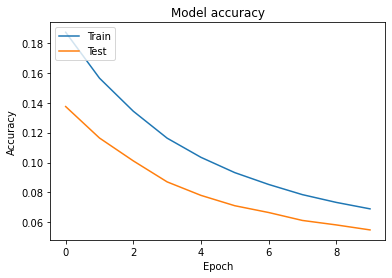

In [0]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit([train.userSeq, train.movieSeq], train.rating,
                    batch_size=32, epochs=10, verbose=1,
                    validation_data=([test.userSeq, test.movieSeq], test.rating))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

pretty small variance only 0.02, low lost about 0.0something

In [0]:
# The user for whom we want to make recommendations
userNumber = 0

uniqueMovies = ratings.drop_duplicates(subset=['movieSeq'])

movie_vector = uniqueMovies.movieSeq.values
user_vector = np.ones((len(uniqueMovies),)) * userNumber
predictions = model.predict([user_vector, movie_vector])
pSeries = pd.Series([a[0] for a in predictions])
predictedDF = uniqueMovies.copy()
predictedDF['Predictions'] = pSeries

predictedDF.sort_values(by='Predictions', ascending=False).head(10)

,userId,movieId,rating,title,userSeq,movieSeq,Predictions
4121,1,592,4.0,Batman (1989),0,509,6.420135
5770,1,1025,5.0,"Sword in the Stone, The (1963)",0,783,6.004246
6127,1,1080,5.0,Monty Python's Life of Brian (1979),0,819,5.660475
2316,1,349,4.0,Clear and Present Danger (1994),0,307,5.631418
4830,1,648,3.0,Mission: Impossible (1996),0,546,5.359643
4992,1,661,5.0,James and the Giant Peach (1996),0,551,5.348831
369,1,47,5.0,Seven (a.k.a. Se7en) (1995),0,43,5.080683
6347,1,1090,4.0,Platoon (1986),0,828,5.077992
6457,1,1097,5.0,E.T. the Extra-Terrestrial (1982),0,835,5.046585
2755,1,362,5.0,"Jungle Book, The (1994)",0,320,4.983325


In [0]:
oneUser = predictedDF[predictedDF.userSeq == userNumber].copy()
oneUser['Error'] = (oneUser.rating - oneUser.Predictions)**2
oneUser.sort_values(by='Error', ascending=False).head(5)

,userId,movieId,rating,title,userSeq,movieSeq,Predictions,Error
4649,1,608,5.0,Fargo (1996),0,520,0.874967,17.015893
8450,1,1256,5.0,Duck Soup (1933),0,954,1.579868,11.697301
6641,1,1136,5.0,Monty Python and the Holy Grail (1975),0,862,1.658444,11.165994
7130,1,1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,0,899,1.705459,10.853999
5795,1,1029,5.0,Dumbo (1941),0,786,1.770287,10.431049


big error

In [0]:
ratings[ratings.movieSeq == 520].sort_values(by='rating', ascending=True)


,userId,movieId,rating,title,userSeq,movieSeq
4827,607,608,2.0,Fargo (1996),606,520
4672,78,608,2.0,Fargo (1996),77,520
4810,546,608,2.0,Fargo (1996),545,520
4669,71,608,2.0,Fargo (1996),70,520
4812,554,608,2.0,Fargo (1996),553,520
...,...,...,...,...,...,...
4725,251,608,5.0,Fargo (1996),250,520
4718,221,608,5.0,Fargo (1996),220,520
4717,220,608,5.0,Fargo (1996),219,520
4754,324,608,5.0,Fargo (1996),323,520


may have similar interest user that rate 2 and also rate 5, therefore it may get error